In [99]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [100]:
train=pd.read_csv('Train_aBjfeNk.csv')
test=pd.read_csv('Test_LqhgPWU.csv')

In [101]:
df=pd.concat([train,test],axis=0,ignore_index=True)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


# Data Reading and Eyeballing

In [102]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [103]:
# Checking for missing values
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

In [104]:
# Shape of the data
df.shape

(10695, 11)

In [105]:
# Corelation matrix
df.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.009562,-0.029351,0.014095
Age,-0.009562,1.000000,-0.189653,-0.281725
Work_Experience,-0.029351,-0.189653,1.000000,-0.065163
Family_Size,0.014095,-0.281725,-0.065163,1.000000


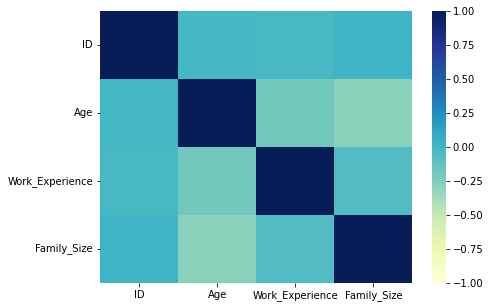

In [106]:
# Visualization of the corelation matrix
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu')
plt.show()

In [107]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [108]:
pd.DataFrame(df.groupby('Segmentation')['Spending_Score'].value_counts())

Spending_Score
Segmentation Spending_Score                
A            Low                       1358
             Average                    343
             High                       271
B            Low                        884
             Average                    590
             High                       384
C            Average                    903
             Low                        662
             High                       405
D            Low                       1974
             High                       156
             Average                    138

* C has the highest number of high spending score
* D has the highest number of low spenders
* C has the maximum number of average spenders

Note: Cluster Count will be 4 because segmentation has been done in 4 segments

In [109]:
# Mapping the target segment
mapped={'D':0,'A':1,'B':2,'C':3}
df.Segmentation=df.Segmentation.map(mapped)

In [110]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


# Univariate and Bivariate analysis

In [111]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [112]:
cats=[ 'Gender', 'Ever_Married' ,'Graduated', 'Profession',
        'Spending_Score', 'Var_1',
       'Segmentation']

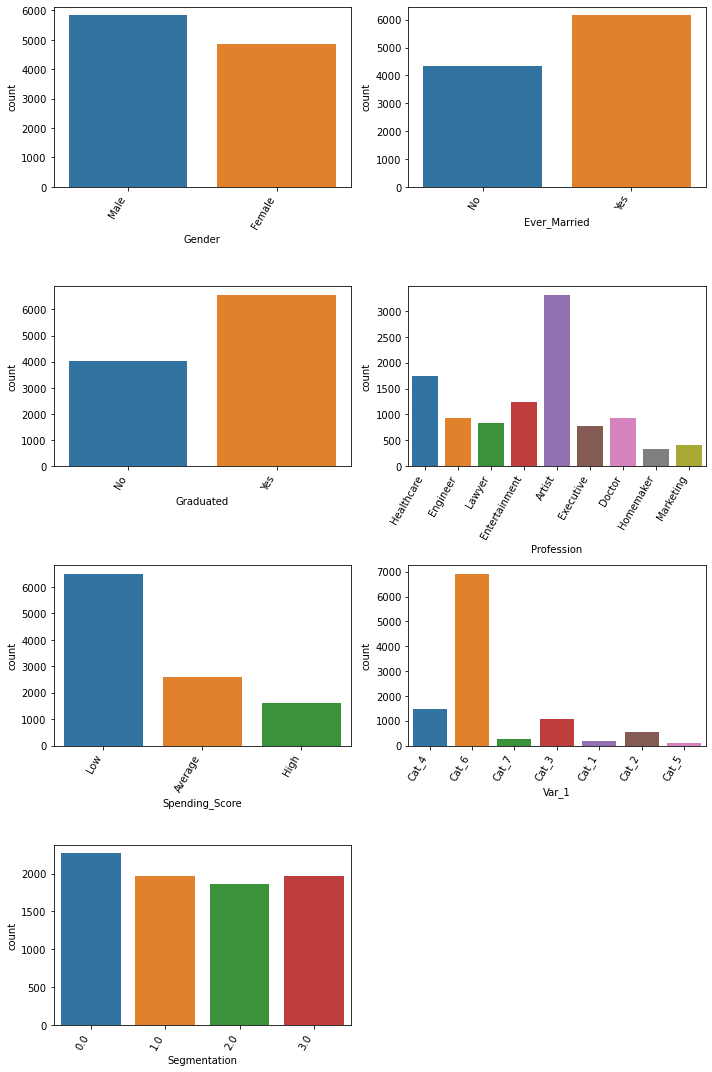

In [113]:
rows=4
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,15]
for i in cats:
    plt.subplot(rows,cols,counter)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

* More males than females followed by Graduation=Yes
* Most People are Married and most Artist followed by Healthcare
* Most of the people are low spenders
* Highest frequency of var_1 is category 6, followed category 4, category 3 and category 2

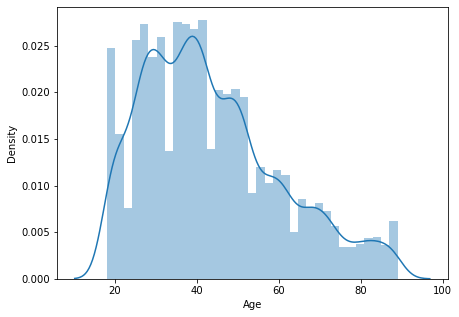

In [114]:
plt.rcParams['figure.figsize']=[7,5]
sns.distplot(df.Age)
plt.show()

In [115]:
df.Age.describe()

count    10695.000000
mean        43.511828
std         16.774158
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         89.000000
Name: Age, dtype: float64

In [116]:
# Lets explore age basis spending score and segmentation
df.groupby(['Spending_Score','Segmentation'])['Age'].describe()

count       mean        std   min   25%   50%  \
Spending_Score Segmentation                                                   
Average        0.0            138.0  37.746377  11.353035  18.0  30.0  36.0   
               1.0            343.0  42.157434  11.885602  20.0  35.0  40.0   
               2.0            590.0  46.866102  10.451637  25.0  38.0  46.0   
               3.0            903.0  50.053156  10.195182  22.0  42.0  50.0   
High           0.0            156.0  48.192308  20.404653  18.0  30.0  42.0   
               1.0            271.0  58.494465  20.482490  18.0  39.5  59.0   
               2.0            384.0  58.643229  16.154292  18.0  45.0  58.0   
               3.0            405.0  60.167901  14.733489  19.0  49.0  60.0   
Low            0.0           1974.0  31.915907  14.833252  18.0  22.0  28.0   
               1.0           1358.0  42.916053  15.138088  18.0  32.0  40.0   
               2.0            884.0  44.554299  14.597057  18.0  33.0  42.0   
               3.0            662.0  41.160121  14.793844  18.0  30.0  38.0   

                               75%   max  
Spending_Score Segmentation               
Average        0.0           41.75  72.0  
               1.0           48.50  89.0  
               2.0           53.00  74.0  
               3.0           57.00  88.0  
High           0.0           68.00  89.0  
               1.0           77.00  89.0  
               2.0           72.00  89.0  
               3.0           71.00  89.0  
Low            0.0           35.00  89.0  
               1.0           50.00  89.0  
               2.0           53.00  89.0  
               3.0           50.00  88.0

* High Spenders have an average age in range of 48-60
* Low spenders have an average age in the range of 31-41

In [117]:
# Check Anova
# Ho: Age has no impact on target
# Ha: Age has an impact on the segmentation

# This means we have to explore and specify the age brackets
# for effecting targetting...
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [118]:
model=ols('Age~Segmentation',data=df).fit()
anova_lm(model)
# Age is significant for the target

,df,sum_sq,mean_sq,F,PR(>F)
Segmentation,1.0,2.789096e+05,278909.579952,1139.62984,8.446113e-234
Residual,8066.0,1.974049e+06,244.736993,NaN,NaN


In [119]:
# Age Bins:- 18-25,25-30,30-40,40-50,>50

In [120]:
def bin_age(x):
    if x<=25:
        return 1
    elif x<=30:
        return 2
    elif x<=40:
        return 3
    elif x<=50:
        return 4
    else:
        return 5

In [121]:
df['Age_cat']=df.Age.apply(bin_age)

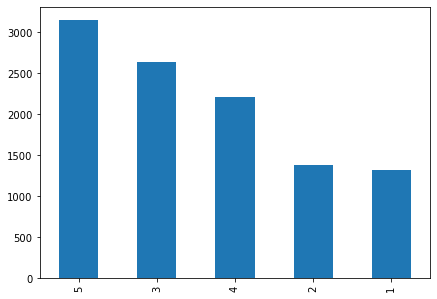

In [122]:
df.Age_cat.value_counts().plot.bar()
plt.show()

# Handling missing values

In [123]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [124]:
df.loc[df.Ever_Married=='No','Spending_Score'].value_counts()

Low    4342
Name: Spending_Score, dtype: int64

In [125]:
df.loc[(df.Ever_Married.isnull()) & (df.Spending_Score=='Low'),'Ever_Married']='No'

In [126]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        103
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [127]:
df.Ever_Married.fillna('unk',inplace=True)

In [128]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [129]:
df.Graduated.fillna('unk',inplace=True)

In [130]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [131]:
df.Profession.fillna('unk',inplace=True)

In [132]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [133]:
df.Work_Experience.fillna(-1,inplace=True)

In [134]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [135]:
df.Family_Size.fillna(-1,inplace=True)

In [136]:
df.Var_1.fillna('unk',inplace=True)

In [137]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_cat               0
dtype: int64

In [138]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0.0,1
1,462643,Female,Yes,38,Yes,Engineer,-1.0,Average,3.0,Cat_4,1.0,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2.0,5
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2.0,5
4,462669,Female,Yes,40,Yes,Entertainment,-1.0,High,6.0,Cat_6,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN,2
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN,3
10692,467960,Female,No,53,Yes,Entertainment,-1.0,Low,2.0,Cat_6,NaN,5
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN,4


# Mapping the variables

In [139]:
df.Gender=df.Gender.map({'Male':1,'Female':2})
df.Ever_Married=df.Ever_Married.map({'No':1,'Yes':2,'unk':3})
df.Graduated=df.Graduated.map({'No':1,'Yes':2,'unk':3})
df.Spending_Score=df.Spending_Score.map({'Low':1,'Average':2,'High':3})

In [140]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_cat               0
dtype: int64

In [141]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat
0,462809,1,1,22,1,Healthcare,1.0,1,4.0,Cat_4,0.0,1
1,462643,2,2,38,2,Engineer,-1.0,2,3.0,Cat_4,1.0,3
2,466315,2,2,67,2,Engineer,1.0,1,1.0,Cat_6,2.0,5
3,461735,1,2,67,2,Lawyer,0.0,3,2.0,Cat_6,2.0,5
4,462669,2,2,40,2,Entertainment,-1.0,3,6.0,Cat_6,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,Healthcare,9.0,1,4.0,Cat_6,NaN,2
10691,467958,2,1,35,2,Doctor,1.0,1,1.0,Cat_6,NaN,3
10692,467960,2,1,53,2,Entertainment,-1.0,1,2.0,Cat_6,NaN,5
10693,467961,1,2,47,2,Executive,1.0,3,5.0,Cat_4,NaN,4


In [142]:
df.Var_1=df.Var_1.map({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7,'unk':8})

In [143]:
df.Var_1.value_counts()

6    6910
4    1475
3    1089
2     563
7     269
1     167
5     114
8     108
Name: Var_1, dtype: int64

In [144]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_cat               0
dtype: int64

In [145]:
df.Profession.value_counts().index

Index(['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
       'Executive', 'Marketing', 'Homemaker', 'unk'],
      dtype='object')

In [146]:
df.Profession=df.Profession.map({'Artist':1, 'Healthcare':2, 'Entertainment':3, 'Engineer':4, 'Doctor':5, 'Lawyer':6,
       'Executive':7, 'Marketing':8, 'Homemaker':9, 'unk':10})

In [147]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,2,9.0,1,4.0,6,NaN,2
10691,467958,2,1,35,2,5,1.0,1,1.0,6,NaN,3
10692,467960,2,1,53,2,3,-1.0,1,2.0,6,NaN,5
10693,467961,1,2,47,2,7,1.0,3,5.0,4,NaN,4


In [148]:
def family_bin(x):
    if x<2:
        return 1
    elif x<=5:
        return 2
    else:
        return 3

In [149]:
df['family_cat']=df.Family_Size.apply(family_bin)

In [150]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat,family_cat
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1,2
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3,2
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5,1
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5,2
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,2,9.0,1,4.0,6,NaN,2,2
10691,467958,2,1,35,2,5,1.0,1,1.0,6,NaN,3,1
10692,467960,2,1,53,2,3,-1.0,1,2.0,6,NaN,5,2
10693,467961,1,2,47,2,7,1.0,3,5.0,4,NaN,4,2


In [151]:
df.Work_Experience.describe()

count    10695.000000
mean         2.248153
std          3.394726
min         -1.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         14.000000
Name: Work_Experience, dtype: float64

In [152]:
df.loc[(df.Age>60) & (df.Work_Experience==0)]
# There are people with High age and 0 work experience

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat,family_cat
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5,2
8,465015,2,2,61,2,4,0.0,1,3.0,7,0.0,5,2
19,464291,2,2,79,2,1,0.0,3,1.0,6,3.0,5,1
62,464091,1,2,74,2,6,0.0,3,3.0,6,0.0,5,2
97,461334,1,2,63,2,1,0.0,3,2.0,6,3.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10600,467659,1,2,65,2,3,0.0,2,2.0,6,NaN,5,2
10621,467726,1,2,82,2,6,0.0,3,2.0,6,NaN,5,2
10635,467768,1,2,62,2,5,0.0,2,2.0,6,NaN,5,2
10647,467815,2,2,73,2,1,0.0,1,2.0,6,NaN,5,2


In [153]:
def work_bin(x):
    if x<=0:
        return 0
    elif x==1:
        return 1
    elif (x<=5):
        return 2
    elif x<=10:
        return 3
    else:
        return 4

In [154]:
df['Work_cat']=df.Work_Experience.apply(work_bin)

In [155]:
df.Work_cat.value_counts()

0    4185
1    3127
3    1810
2    1326
4     247
Name: Work_cat, dtype: int64

# Feature Engineering

In [156]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_cat', 'family_cat', 'Work_cat'],
      dtype='object')

In [157]:
temp=df.groupby('Age').agg({'Spending_Score':['count','min','mean','max'],
                           'Family_Size':['count','min','max'],
                           'Work_Experience':['count','min','mean','max'],
                           'Profession':['count','min','max'],
                           'Var_1':['count','min','max']})

In [158]:
temp.columns=['_'.join(x) for x in temp.columns]

In [159]:
new=pd.merge(left=df,right=temp,on='Age',how='left')

In [160]:
new.shape

(10695, 31)

In [161]:
new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat,family_cat,Work_cat,Spending_Score_count,Spending_Score_min,Spending_Score_mean,Spending_Score_max,Family_Size_count,Family_Size_min,Family_Size_max,Work_Experience_count,Work_Experience_min,Work_Experience_mean,Work_Experience_max,Profession_count,Profession_min,Profession_max,Var_1_count,Var_1_min,Var_1_max
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1,2,1,184,1,1.092391,3,184,-1.0,9.0,184,-1.0,1.820652,11.0,184,1,10,184,1,8
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3,2,0,288,1,1.482639,3,288,-1.0,8.0,288,-1.0,3.100694,14.0,288,1,10,288,1,8
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5,1,1,78,1,2.012821,3,78,-1.0,9.0,78,-1.0,0.717949,10.0,78,1,10,78,1,7
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5,2,0,78,1,2.012821,3,78,-1.0,9.0,78,-1.0,0.717949,10.0,78,1,10,78,1,7
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,3,3,0,300,1,1.466667,3,300,-1.0,9.0,300,-1.0,3.220000,14.0,300,1,10,300,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,2,9.0,1,4.0,6,NaN,2,2,3,244,1,1.217213,3,244,-1.0,9.0,244,-1.0,2.799180,14.0,244,1,9,244,1,8
10691,467958,2,1,35,2,5,1.0,1,1.0,6,NaN,3,1,1,321,1,1.514019,3,321,-1.0,7.0,321,-1.0,3.233645,14.0,321,1,10,321,1,8
10692,467960,2,1,53,2,3,-1.0,1,2.0,6,NaN,5,2,0,199,1,1.788945,3,199,-1.0,7.0,199,-1.0,2.140704,14.0,199,1,9,199,1,8
10693,467961,1,2,47,2,7,1.0,3,5.0,4,NaN,4,2,1,217,1,1.737327,3,217,-1.0,7.0,217,-1.0,1.649770,13.0,217,1,10,217,1,8


# Split the data in train and test

In [162]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [163]:
newtrain=new.iloc[:train.shape[0],:]
newtest=new.iloc[train.shape[0]:,:]

In [164]:
newtrain.shape,newtest.shape

((8068, 31), (2627, 31))

In [165]:
newtest.drop(columns=['ID','Segmentation'],inplace=True)

In [166]:
newtrain.drop(columns=['ID'],inplace=True)

In [167]:
X=newtrain.drop(columns='Segmentation')
y=newtrain.Segmentation

In [168]:
X.shape,newtest.shape

((8068, 29), (2627, 29))

In [169]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=420)

X['Clusters']=kmeans.fit_predict(X)

In [170]:
kmeans=KMeans(n_clusters=4,random_state=420)
newtest['Clusters']=kmeans.fit_predict(newtest)

In [171]:
X.shape,newtest.shape

((8068, 30), (2627, 30))

# Model Bulding

In [172]:
new_train=df.iloc[:train.shape[0],:]
new_test=df.iloc[train.shape[0]:,:]

In [173]:
new_test.drop(columns=['ID','Segmentation'],inplace=True)
new_train.drop(columns=['ID'],inplace=True)

In [176]:
X1=new_train.drop(columns='Segmentation')
y1=new_train.Segmentation

In [177]:
X1.shape,new_test.shape

((8068, 12), (2627, 12))

In [178]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=420)

X1['Clusters']=kmeans.fit_predict(X1)

In [179]:
kmeans=KMeans(n_clusters=4,random_state=420)
new_test['Clusters']=kmeans.fit_predict(new_test)

In [186]:
X1.shape,new_test.shape

((8068, 13), (2627, 13))

In [187]:
xxtrain,xxtest,yytrain,yytest=train_test_split(X1,y1,test_size=0.20,random_state=420,stratify=X1['Clusters'])

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [184]:
lg=LogisticRegression(random_state=140)
rf=RandomForestClassifier(random_state=598,criterion='entropy')
gbm=GradientBoostingClassifier(random_state=150)
xgb=XGBClassifier(random_state=138)
lgbm=LGBMClassifier(random_state=438)
cboost=CatBoostClassifier(random_state=660)

In [189]:
from sklearn.metrics import accuracy_score
for model,name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost']):
    model.fit(xtrain,ytrain)
    print(name,'model generates accuracy score of',accuracy_score(yytest,model.predict(xxtest)))

lg model generates accuracy score of 0.4423791821561338
rf model generates accuracy score of 0.48946716232961585
gbm model generates accuracy score of 0.5340768277571252
xgb model generates accuracy score of 0.5080545229244114
lgbm model generates accuracy score of 0.5340768277571252
Learning rate set to 0.087021
0:	learn: 1.3392264	total: 4.09ms	remaining: 4.09s
1:	learn: 1.3066431	total: 7.95ms	remaining: 3.97s
2:	learn: 1.2745249	total: 11.6ms	remaining: 3.86s
3:	learn: 1.2483035	total: 15.6ms	remaining: 3.89s
4:	learn: 1.2265280	total: 19.5ms	remaining: 3.87s
5:	learn: 1.2069136	total: 23.4ms	remaining: 3.87s
6:	learn: 1.1891131	total: 27.1ms	remaining: 3.85s
7:	learn: 1.1757398	total: 30.9ms	remaining: 3.83s
8:	learn: 1.1621481	total: 34.7ms	remaining: 3.83s
9:	learn: 1.1504179	total: 38.3ms	remaining: 3.79s
10:	learn: 1.1394115	total: 42.1ms	remaining: 3.79s
11:	learn: 1.1298674	total: 46.1ms	remaining: 3.79s
12:	learn: 1.1218770	total: 49.9ms	remaining: 3.79s
13:	learn: 1.114311

197:	learn: 0.9120667	total: 690ms	remaining: 2.79s
198:	learn: 0.9117406	total: 693ms	remaining: 2.79s
199:	learn: 0.9113192	total: 697ms	remaining: 2.79s
200:	learn: 0.9108055	total: 700ms	remaining: 2.78s
201:	learn: 0.9101376	total: 704ms	remaining: 2.78s
202:	learn: 0.9095877	total: 707ms	remaining: 2.78s
203:	learn: 0.9092135	total: 711ms	remaining: 2.77s
204:	learn: 0.9086225	total: 714ms	remaining: 2.77s
205:	learn: 0.9077068	total: 718ms	remaining: 2.77s
206:	learn: 0.9072940	total: 721ms	remaining: 2.76s
207:	learn: 0.9068656	total: 724ms	remaining: 2.76s
208:	learn: 0.9063235	total: 728ms	remaining: 2.75s
209:	learn: 0.9058254	total: 732ms	remaining: 2.75s
210:	learn: 0.9053468	total: 735ms	remaining: 2.75s
211:	learn: 0.9048202	total: 738ms	remaining: 2.74s
212:	learn: 0.9045534	total: 741ms	remaining: 2.74s
213:	learn: 0.9042379	total: 745ms	remaining: 2.73s
214:	learn: 0.9037866	total: 748ms	remaining: 2.73s
215:	learn: 0.9034909	total: 752ms	remaining: 2.73s
216:	learn: 

357:	learn: 0.8434923	total: 1.23s	remaining: 2.2s
358:	learn: 0.8428481	total: 1.23s	remaining: 2.2s
359:	learn: 0.8422860	total: 1.24s	remaining: 2.2s
360:	learn: 0.8417886	total: 1.24s	remaining: 2.19s
361:	learn: 0.8413454	total: 1.24s	remaining: 2.19s
362:	learn: 0.8409132	total: 1.25s	remaining: 2.19s
363:	learn: 0.8403685	total: 1.25s	remaining: 2.18s
364:	learn: 0.8399538	total: 1.25s	remaining: 2.18s
365:	learn: 0.8394251	total: 1.26s	remaining: 2.18s
366:	learn: 0.8388816	total: 1.26s	remaining: 2.18s
367:	learn: 0.8384644	total: 1.27s	remaining: 2.17s
368:	learn: 0.8382012	total: 1.27s	remaining: 2.17s
369:	learn: 0.8379528	total: 1.27s	remaining: 2.17s
370:	learn: 0.8373910	total: 1.28s	remaining: 2.17s
371:	learn: 0.8372397	total: 1.28s	remaining: 2.16s
372:	learn: 0.8367492	total: 1.29s	remaining: 2.16s
373:	learn: 0.8362060	total: 1.29s	remaining: 2.16s
374:	learn: 0.8359426	total: 1.29s	remaining: 2.16s
375:	learn: 0.8356695	total: 1.3s	remaining: 2.15s
376:	learn: 0.83

557:	learn: 0.7727432	total: 1.94s	remaining: 1.53s
558:	learn: 0.7722521	total: 1.94s	remaining: 1.53s
559:	learn: 0.7720046	total: 1.94s	remaining: 1.52s
560:	learn: 0.7718003	total: 1.94s	remaining: 1.52s
561:	learn: 0.7715589	total: 1.95s	remaining: 1.52s
562:	learn: 0.7712637	total: 1.95s	remaining: 1.51s
563:	learn: 0.7709503	total: 1.96s	remaining: 1.51s
564:	learn: 0.7703589	total: 1.96s	remaining: 1.51s
565:	learn: 0.7700080	total: 1.96s	remaining: 1.5s
566:	learn: 0.7696178	total: 1.97s	remaining: 1.5s
567:	learn: 0.7693799	total: 1.97s	remaining: 1.5s
568:	learn: 0.7691433	total: 1.97s	remaining: 1.49s
569:	learn: 0.7688982	total: 1.97s	remaining: 1.49s
570:	learn: 0.7685838	total: 1.98s	remaining: 1.49s
571:	learn: 0.7681515	total: 1.98s	remaining: 1.48s
572:	learn: 0.7678794	total: 1.98s	remaining: 1.48s
573:	learn: 0.7676981	total: 1.99s	remaining: 1.47s
574:	learn: 0.7674903	total: 1.99s	remaining: 1.47s
575:	learn: 0.7671898	total: 1.99s	remaining: 1.47s
576:	learn: 0.7

716:	learn: 0.7266657	total: 2.47s	remaining: 975ms
717:	learn: 0.7263708	total: 2.47s	remaining: 972ms
718:	learn: 0.7261391	total: 2.48s	remaining: 968ms
719:	learn: 0.7257579	total: 2.48s	remaining: 965ms
720:	learn: 0.7254503	total: 2.48s	remaining: 961ms
721:	learn: 0.7252565	total: 2.49s	remaining: 958ms
722:	learn: 0.7247801	total: 2.49s	remaining: 955ms
723:	learn: 0.7243965	total: 2.49s	remaining: 951ms
724:	learn: 0.7241091	total: 2.5s	remaining: 948ms
725:	learn: 0.7238685	total: 2.5s	remaining: 944ms
726:	learn: 0.7237079	total: 2.5s	remaining: 941ms
727:	learn: 0.7233010	total: 2.51s	remaining: 937ms
728:	learn: 0.7230563	total: 2.51s	remaining: 934ms
729:	learn: 0.7227230	total: 2.52s	remaining: 931ms
730:	learn: 0.7225187	total: 2.52s	remaining: 927ms
731:	learn: 0.7223329	total: 2.52s	remaining: 924ms
732:	learn: 0.7220958	total: 2.53s	remaining: 921ms
733:	learn: 0.7218580	total: 2.53s	remaining: 918ms
734:	learn: 0.7216103	total: 2.54s	remaining: 914ms
735:	learn: 0.7

924:	learn: 0.6769349	total: 3.18s	remaining: 258ms
925:	learn: 0.6767402	total: 3.19s	remaining: 255ms
926:	learn: 0.6766226	total: 3.19s	remaining: 251ms
927:	learn: 0.6762339	total: 3.19s	remaining: 248ms
928:	learn: 0.6761520	total: 3.19s	remaining: 244ms
929:	learn: 0.6758313	total: 3.2s	remaining: 241ms
930:	learn: 0.6756205	total: 3.2s	remaining: 237ms
931:	learn: 0.6754449	total: 3.21s	remaining: 234ms
932:	learn: 0.6751359	total: 3.21s	remaining: 230ms
933:	learn: 0.6749017	total: 3.21s	remaining: 227ms
934:	learn: 0.6745355	total: 3.21s	remaining: 224ms
935:	learn: 0.6744510	total: 3.22s	remaining: 220ms
936:	learn: 0.6743298	total: 3.22s	remaining: 217ms
937:	learn: 0.6741244	total: 3.22s	remaining: 213ms
938:	learn: 0.6737971	total: 3.23s	remaining: 210ms
939:	learn: 0.6734156	total: 3.23s	remaining: 206ms
940:	learn: 0.6731535	total: 3.23s	remaining: 203ms
941:	learn: 0.6730598	total: 3.24s	remaining: 199ms
942:	learn: 0.6728258	total: 3.24s	remaining: 196ms
943:	learn: 0.

In [75]:
## We will build all the models by splitting the train data as website has some issues

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=420,stratify=X['Clusters'])

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [79]:
lg=LogisticRegression(random_state=140)
rf=RandomForestClassifier(random_state=598,criterion='entropy')
gbm=GradientBoostingClassifier(random_state=150)
xgb=XGBClassifier(random_state=138)
lgbm=LGBMClassifier(random_state=438)
cboost=CatBoostClassifier(random_state=660)

In [82]:
from sklearn.metrics import accuracy_score
for model,name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost']):
    model.fit(xtrain,ytrain)
    print(name,'model generates accuracy score of',accuracy_score(ytest,model.predict(xtest)))

lg model generates accuracy score of 0.4591078066914498
rf model generates accuracy score of 0.47769516728624534
gbm model generates accuracy score of 0.5309789343246593
xgb model generates accuracy score of 0.5117719950433705
lgbm model generates accuracy score of 0.5260223048327137
Learning rate set to 0.087021
0:	learn: 1.3385779	total: 5.97ms	remaining: 5.97s
1:	learn: 1.3021036	total: 11.3ms	remaining: 5.62s
2:	learn: 1.2716745	total: 16.7ms	remaining: 5.53s
3:	learn: 1.2446432	total: 21.9ms	remaining: 5.46s
4:	learn: 1.2222361	total: 27.1ms	remaining: 5.39s
5:	learn: 1.2037934	total: 32.2ms	remaining: 5.34s
6:	learn: 1.1875957	total: 39.6ms	remaining: 5.62s
7:	learn: 1.1722763	total: 46.4ms	remaining: 5.75s
8:	learn: 1.1601900	total: 53ms	remaining: 5.84s
9:	learn: 1.1479051	total: 59.2ms	remaining: 5.86s
10:	learn: 1.1386658	total: 64ms	remaining: 5.75s
11:	learn: 1.1291315	total: 68.8ms	remaining: 5.67s
12:	learn: 1.1204484	total: 73.1ms	remaining: 5.55s
13:	learn: 1.1125544	to

166:	learn: 0.9245730	total: 736ms	remaining: 3.67s
167:	learn: 0.9238549	total: 740ms	remaining: 3.67s
168:	learn: 0.9231780	total: 745ms	remaining: 3.66s
169:	learn: 0.9226699	total: 750ms	remaining: 3.66s
170:	learn: 0.9219934	total: 755ms	remaining: 3.66s
171:	learn: 0.9209475	total: 760ms	remaining: 3.66s
172:	learn: 0.9201076	total: 765ms	remaining: 3.65s
173:	learn: 0.9193945	total: 769ms	remaining: 3.65s
174:	learn: 0.9185986	total: 773ms	remaining: 3.65s
175:	learn: 0.9181368	total: 778ms	remaining: 3.64s
176:	learn: 0.9179463	total: 781ms	remaining: 3.63s
177:	learn: 0.9174619	total: 785ms	remaining: 3.63s
178:	learn: 0.9166760	total: 789ms	remaining: 3.62s
179:	learn: 0.9163766	total: 793ms	remaining: 3.61s
180:	learn: 0.9159427	total: 797ms	remaining: 3.61s
181:	learn: 0.9156349	total: 801ms	remaining: 3.6s
182:	learn: 0.9149193	total: 805ms	remaining: 3.59s
183:	learn: 0.9143798	total: 809ms	remaining: 3.59s
184:	learn: 0.9136839	total: 813ms	remaining: 3.58s
185:	learn: 0

346:	learn: 0.8227229	total: 1.49s	remaining: 2.81s
347:	learn: 0.8221748	total: 1.5s	remaining: 2.8s
348:	learn: 0.8216953	total: 1.5s	remaining: 2.8s
349:	learn: 0.8213021	total: 1.5s	remaining: 2.79s
350:	learn: 0.8210281	total: 1.51s	remaining: 2.79s
351:	learn: 0.8207531	total: 1.51s	remaining: 2.78s
352:	learn: 0.8203451	total: 1.52s	remaining: 2.78s
353:	learn: 0.8198557	total: 1.52s	remaining: 2.77s
354:	learn: 0.8195370	total: 1.52s	remaining: 2.77s
355:	learn: 0.8190810	total: 1.53s	remaining: 2.77s
356:	learn: 0.8185163	total: 1.53s	remaining: 2.76s
357:	learn: 0.8179725	total: 1.54s	remaining: 2.76s
358:	learn: 0.8175497	total: 1.54s	remaining: 2.75s
359:	learn: 0.8168326	total: 1.55s	remaining: 2.75s
360:	learn: 0.8162669	total: 1.55s	remaining: 2.75s
361:	learn: 0.8159203	total: 1.55s	remaining: 2.74s
362:	learn: 0.8154754	total: 1.56s	remaining: 2.74s
363:	learn: 0.8151914	total: 1.56s	remaining: 2.73s
364:	learn: 0.8146878	total: 1.57s	remaining: 2.73s
365:	learn: 0.814

524:	learn: 0.7505036	total: 2.24s	remaining: 2.03s
525:	learn: 0.7502856	total: 2.25s	remaining: 2.02s
526:	learn: 0.7499989	total: 2.25s	remaining: 2.02s
527:	learn: 0.7496045	total: 2.25s	remaining: 2.01s
528:	learn: 0.7489983	total: 2.26s	remaining: 2.01s
529:	learn: 0.7486105	total: 2.26s	remaining: 2.01s
530:	learn: 0.7480588	total: 2.27s	remaining: 2s
531:	learn: 0.7478128	total: 2.27s	remaining: 2s
532:	learn: 0.7473706	total: 2.28s	remaining: 1.99s
533:	learn: 0.7472035	total: 2.28s	remaining: 1.99s
534:	learn: 0.7468935	total: 2.28s	remaining: 1.99s
535:	learn: 0.7466602	total: 2.29s	remaining: 1.98s
536:	learn: 0.7464676	total: 2.29s	remaining: 1.98s
537:	learn: 0.7462271	total: 2.3s	remaining: 1.97s
538:	learn: 0.7458344	total: 2.3s	remaining: 1.97s
539:	learn: 0.7454681	total: 2.3s	remaining: 1.96s
540:	learn: 0.7450935	total: 2.31s	remaining: 1.96s
541:	learn: 0.7448632	total: 2.31s	remaining: 1.95s
542:	learn: 0.7446241	total: 2.32s	remaining: 1.95s
543:	learn: 0.7443063

699:	learn: 0.6945223	total: 2.99s	remaining: 1.28s
700:	learn: 0.6940900	total: 3s	remaining: 1.28s
701:	learn: 0.6938030	total: 3s	remaining: 1.27s
702:	learn: 0.6935500	total: 3s	remaining: 1.27s
703:	learn: 0.6931476	total: 3.01s	remaining: 1.26s
704:	learn: 0.6928647	total: 3.01s	remaining: 1.26s
705:	learn: 0.6924583	total: 3.02s	remaining: 1.26s
706:	learn: 0.6920499	total: 3.02s	remaining: 1.25s
707:	learn: 0.6914511	total: 3.03s	remaining: 1.25s
708:	learn: 0.6912825	total: 3.03s	remaining: 1.24s
709:	learn: 0.6909893	total: 3.04s	remaining: 1.24s
710:	learn: 0.6904367	total: 3.04s	remaining: 1.24s
711:	learn: 0.6901219	total: 3.04s	remaining: 1.23s
712:	learn: 0.6896757	total: 3.05s	remaining: 1.23s
713:	learn: 0.6894470	total: 3.05s	remaining: 1.22s
714:	learn: 0.6891020	total: 3.06s	remaining: 1.22s
715:	learn: 0.6887012	total: 3.06s	remaining: 1.21s
716:	learn: 0.6885129	total: 3.06s	remaining: 1.21s
717:	learn: 0.6882128	total: 3.07s	remaining: 1.21s
718:	learn: 0.6878309

876:	learn: 0.6432084	total: 3.74s	remaining: 524ms
877:	learn: 0.6428278	total: 3.74s	remaining: 520ms
878:	learn: 0.6426467	total: 3.75s	remaining: 516ms
879:	learn: 0.6424787	total: 3.75s	remaining: 512ms
880:	learn: 0.6422494	total: 3.76s	remaining: 507ms
881:	learn: 0.6420803	total: 3.76s	remaining: 503ms
882:	learn: 0.6419106	total: 3.76s	remaining: 499ms
883:	learn: 0.6413525	total: 3.77s	remaining: 495ms
884:	learn: 0.6411272	total: 3.77s	remaining: 490ms
885:	learn: 0.6408828	total: 3.78s	remaining: 486ms
886:	learn: 0.6407338	total: 3.78s	remaining: 482ms
887:	learn: 0.6406374	total: 3.79s	remaining: 477ms
888:	learn: 0.6402925	total: 3.79s	remaining: 473ms
889:	learn: 0.6401323	total: 3.79s	remaining: 469ms
890:	learn: 0.6399779	total: 3.8s	remaining: 465ms
891:	learn: 0.6397868	total: 3.8s	remaining: 460ms
892:	learn: 0.6395496	total: 3.81s	remaining: 456ms
893:	learn: 0.6392995	total: 3.81s	remaining: 452ms
894:	learn: 0.6392247	total: 3.81s	remaining: 448ms
895:	learn: 0.

In [84]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smote = SMOTE()

In [87]:
smote_xsamp, smote_y = smote.fit_resample(X,y)

In [88]:
sxtrain,sxtest,sytrain,sytest=train_test_split(smote_xsamp,smote_y,test_size=0.20,random_state=420,stratify=smote_xsamp['Clusters'])

In [89]:
from sklearn.metrics import accuracy_score
for model,name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost']):
    model.fit(sxtrain,sytrain)
    print(name,'model generates accuracy score of',accuracy_score(ytest,model.predict(xtest)))

lg model generates accuracy score of 0.4566294919454771
rf model generates accuracy score of 0.7273853779429987
gbm model generates accuracy score of 0.5452292441140025
xgb model generates accuracy score of 0.6654275092936803
lgbm model generates accuracy score of 0.6350681536555143
Learning rate set to 0.087543
0:	learn: 1.3392704	total: 8.17ms	remaining: 8.16s
1:	learn: 1.3033296	total: 15.1ms	remaining: 7.54s
2:	learn: 1.2734305	total: 22.7ms	remaining: 7.54s
3:	learn: 1.2480344	total: 30.3ms	remaining: 7.54s
4:	learn: 1.2284905	total: 37.4ms	remaining: 7.43s
5:	learn: 1.2098833	total: 44.6ms	remaining: 7.39s
6:	learn: 1.1920357	total: 52ms	remaining: 7.38s
7:	learn: 1.1778513	total: 57.9ms	remaining: 7.18s
8:	learn: 1.1675103	total: 63.6ms	remaining: 7s
9:	learn: 1.1573101	total: 69.2ms	remaining: 6.86s
10:	learn: 1.1472105	total: 74.9ms	remaining: 6.74s
11:	learn: 1.1395419	total: 80.7ms	remaining: 6.64s
12:	learn: 1.1306417	total: 87ms	remaining: 6.6s
13:	learn: 1.1217772	total: 

154:	learn: 0.9321038	total: 930ms	remaining: 5.07s
155:	learn: 0.9314990	total: 937ms	remaining: 5.07s
156:	learn: 0.9309619	total: 943ms	remaining: 5.06s
157:	learn: 0.9304206	total: 950ms	remaining: 5.06s
158:	learn: 0.9299498	total: 956ms	remaining: 5.06s
159:	learn: 0.9293301	total: 964ms	remaining: 5.06s
160:	learn: 0.9288763	total: 970ms	remaining: 5.05s
161:	learn: 0.9275942	total: 975ms	remaining: 5.04s
162:	learn: 0.9267736	total: 981ms	remaining: 5.04s
163:	learn: 0.9260419	total: 988ms	remaining: 5.03s
164:	learn: 0.9251780	total: 994ms	remaining: 5.03s
165:	learn: 0.9246762	total: 1000ms	remaining: 5.02s
166:	learn: 0.9239731	total: 1s	remaining: 5.01s
167:	learn: 0.9231193	total: 1.01s	remaining: 5.01s
168:	learn: 0.9227371	total: 1.02s	remaining: 5.01s
169:	learn: 0.9223479	total: 1.02s	remaining: 5s
170:	learn: 0.9216847	total: 1.03s	remaining: 5s
171:	learn: 0.9208364	total: 1.04s	remaining: 4.99s
172:	learn: 0.9201838	total: 1.04s	remaining: 4.98s
173:	learn: 0.919788

313:	learn: 0.8424193	total: 1.87s	remaining: 4.08s
314:	learn: 0.8417826	total: 1.87s	remaining: 4.08s
315:	learn: 0.8415361	total: 1.88s	remaining: 4.07s
316:	learn: 0.8411751	total: 1.89s	remaining: 4.07s
317:	learn: 0.8406572	total: 1.89s	remaining: 4.06s
318:	learn: 0.8401728	total: 1.9s	remaining: 4.06s
319:	learn: 0.8396845	total: 1.91s	remaining: 4.05s
320:	learn: 0.8393158	total: 1.91s	remaining: 4.05s
321:	learn: 0.8388663	total: 1.92s	remaining: 4.04s
322:	learn: 0.8384658	total: 1.93s	remaining: 4.04s
323:	learn: 0.8379953	total: 1.93s	remaining: 4.03s
324:	learn: 0.8371633	total: 1.94s	remaining: 4.03s
325:	learn: 0.8367029	total: 1.95s	remaining: 4.02s
326:	learn: 0.8364633	total: 1.95s	remaining: 4.02s
327:	learn: 0.8357635	total: 1.96s	remaining: 4.01s
328:	learn: 0.8355191	total: 1.97s	remaining: 4.01s
329:	learn: 0.8347281	total: 1.97s	remaining: 4s
330:	learn: 0.8338575	total: 1.98s	remaining: 4s
331:	learn: 0.8332976	total: 1.99s	remaining: 4s
332:	learn: 0.8330940	

480:	learn: 0.7688936	total: 2.96s	remaining: 3.19s
481:	learn: 0.7685830	total: 2.96s	remaining: 3.19s
482:	learn: 0.7682503	total: 2.97s	remaining: 3.18s
483:	learn: 0.7676603	total: 2.98s	remaining: 3.18s
484:	learn: 0.7673863	total: 2.99s	remaining: 3.18s
485:	learn: 0.7670816	total: 3s	remaining: 3.17s
486:	learn: 0.7664494	total: 3.01s	remaining: 3.17s
487:	learn: 0.7659838	total: 3.02s	remaining: 3.17s
488:	learn: 0.7656907	total: 3.03s	remaining: 3.17s
489:	learn: 0.7650531	total: 3.04s	remaining: 3.17s
490:	learn: 0.7648689	total: 3.06s	remaining: 3.17s
491:	learn: 0.7644594	total: 3.06s	remaining: 3.16s
492:	learn: 0.7641114	total: 3.07s	remaining: 3.16s
493:	learn: 0.7637184	total: 3.08s	remaining: 3.15s
494:	learn: 0.7633321	total: 3.09s	remaining: 3.15s
495:	learn: 0.7629639	total: 3.09s	remaining: 3.14s
496:	learn: 0.7625723	total: 3.1s	remaining: 3.14s
497:	learn: 0.7619614	total: 3.1s	remaining: 3.13s
498:	learn: 0.7616618	total: 3.11s	remaining: 3.12s
499:	learn: 0.761

661:	learn: 0.7020263	total: 4.29s	remaining: 2.19s
662:	learn: 0.7016434	total: 4.29s	remaining: 2.18s
663:	learn: 0.7012966	total: 4.3s	remaining: 2.18s
664:	learn: 0.7008249	total: 4.31s	remaining: 2.17s
665:	learn: 0.7003336	total: 4.32s	remaining: 2.17s
666:	learn: 0.6999841	total: 4.32s	remaining: 2.16s
667:	learn: 0.6997482	total: 4.33s	remaining: 2.15s
668:	learn: 0.6994490	total: 4.34s	remaining: 2.15s
669:	learn: 0.6990339	total: 4.34s	remaining: 2.14s
670:	learn: 0.6986288	total: 4.35s	remaining: 2.13s
671:	learn: 0.6983093	total: 4.36s	remaining: 2.13s
672:	learn: 0.6980564	total: 4.36s	remaining: 2.12s
673:	learn: 0.6977683	total: 4.37s	remaining: 2.11s
674:	learn: 0.6975366	total: 4.38s	remaining: 2.11s
675:	learn: 0.6973260	total: 4.38s	remaining: 2.1s
676:	learn: 0.6971295	total: 4.39s	remaining: 2.09s
677:	learn: 0.6968997	total: 4.39s	remaining: 2.09s
678:	learn: 0.6967506	total: 4.4s	remaining: 2.08s
679:	learn: 0.6965530	total: 4.41s	remaining: 2.07s
680:	learn: 0.6

823:	learn: 0.6551321	total: 5.62s	remaining: 1.2s
824:	learn: 0.6550369	total: 5.63s	remaining: 1.19s
825:	learn: 0.6548601	total: 5.64s	remaining: 1.19s
826:	learn: 0.6547180	total: 5.65s	remaining: 1.18s
827:	learn: 0.6541805	total: 5.66s	remaining: 1.17s
828:	learn: 0.6539372	total: 5.67s	remaining: 1.17s
829:	learn: 0.6535155	total: 5.67s	remaining: 1.16s
830:	learn: 0.6530514	total: 5.68s	remaining: 1.16s
831:	learn: 0.6526992	total: 5.69s	remaining: 1.15s
832:	learn: 0.6523120	total: 5.7s	remaining: 1.14s
833:	learn: 0.6520365	total: 5.71s	remaining: 1.14s
834:	learn: 0.6518039	total: 5.71s	remaining: 1.13s
835:	learn: 0.6516474	total: 5.72s	remaining: 1.12s
836:	learn: 0.6515510	total: 5.73s	remaining: 1.11s
837:	learn: 0.6514790	total: 5.73s	remaining: 1.11s
838:	learn: 0.6511984	total: 5.74s	remaining: 1.1s
839:	learn: 0.6509721	total: 5.75s	remaining: 1.09s
840:	learn: 0.6506128	total: 5.76s	remaining: 1.09s
841:	learn: 0.6500999	total: 5.76s	remaining: 1.08s
842:	learn: 0.6

cboost model generates accuracy score of 0.6548946716232962
